In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Customers.Csv

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64
Year
2022    64
2023    57
2024    79
Name: count, dtype: int64


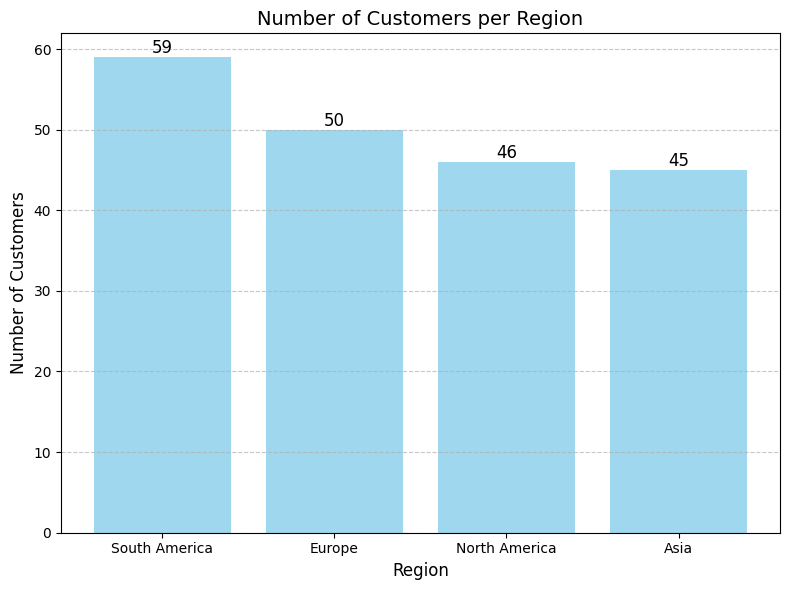

In [32]:
customer = pd.read_csv('Customers.csv')
Region_count = customer['Region'].value_counts()
print(Region_count)

customer['SignupDate'] = pd.to_datetime(customer['SignupDate'])
customer['Year'] = customer['SignupDate'].dt.year
signup_counts = customer['Year'].value_counts().sort_index()
print(signup_counts)

plt.figure(figsize=(8, 6))
bars = plt.bar(region_counts.index, region_counts.values, color='skyblue', alpha=0.8)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()),
             ha='center', va='bottom', fontsize=12)

plt.title('Number of Customers per Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



# Products.CSV

Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


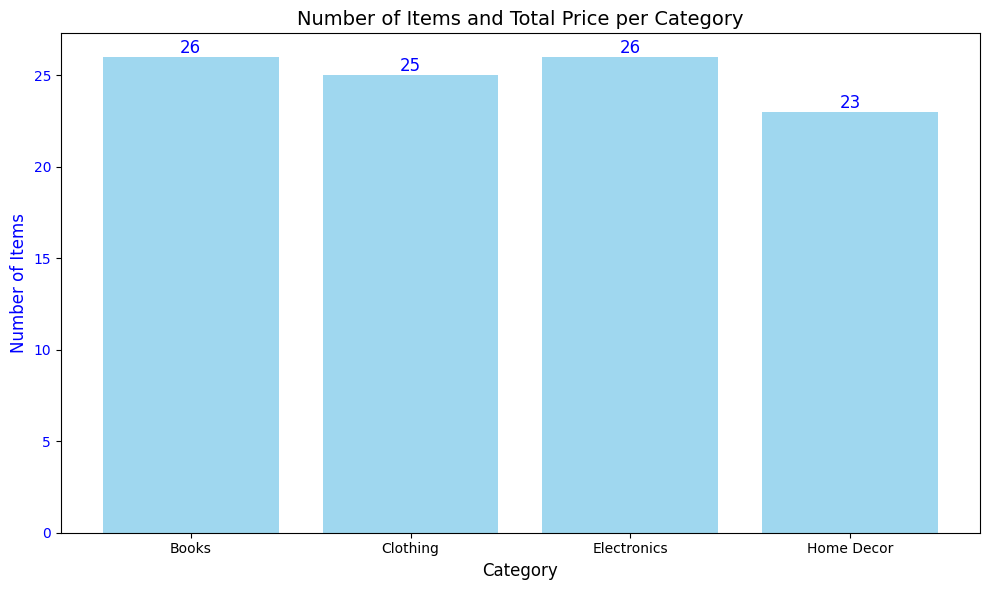

In [24]:
Category = pd.read_csv('Products.csv')
Category_counts = Category['Category'].value_counts()
print(Category_counts)

# Group by category and calculate the count and total sum for each category
category_summary = Category.groupby('Category').agg(
    ItemCount=('ProductID', 'count'),
    TotalPrice=('Price', 'sum')
).reset_index()

# Plot the data
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for item count
bars = ax1.bar(category_summary['Category'], category_summary['ItemCount'], color='skyblue', alpha=0.8, label='Item Count')
ax1.set_xlabel('Category', fontsize=12)
ax1.set_ylabel('Number of Items', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Add item counts on top of bars
for bar in bars:
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()),
             ha='center', va='bottom', fontsize=12, color='blue')


# Title and layout
plt.title('Number of Items and Total Price per Category', fontsize=14)
fig.tight_layout()
plt.show()


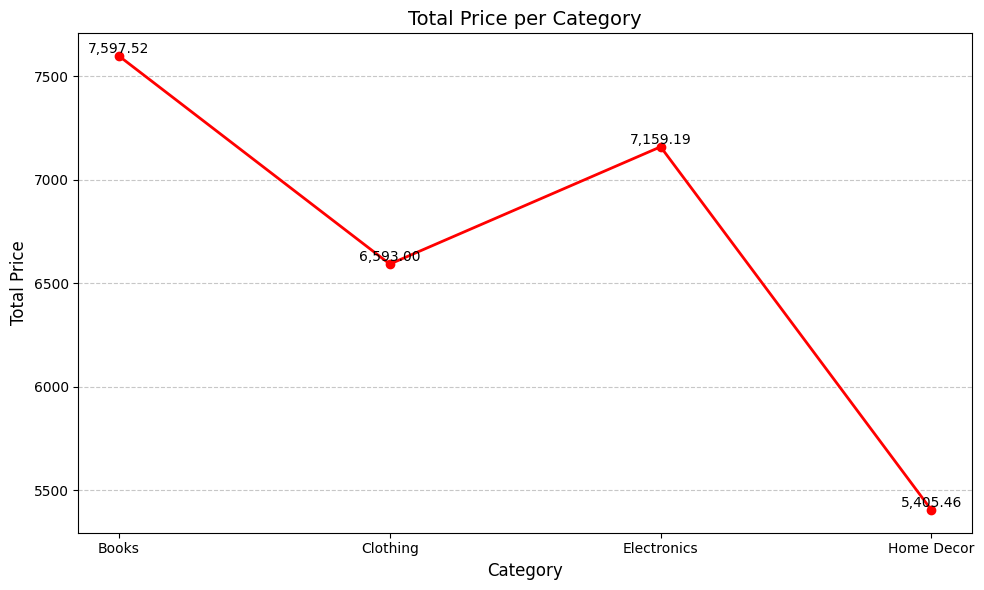

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(category_summary['Category'], category_summary['TotalPrice'], marker='o', color='red', linewidth=2)
plt.title('Total Price per Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Price', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, total in enumerate(category_summary['TotalPrice']):
    plt.text(i, total, f'{total:,.2f}', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

## Transaction.CSV


In [48]:
transac = pd.read_csv('Transactions.csv')
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')

In [49]:
transac = pd.read_csv('Transactions.csv')
transac['TransactionDate'] = pd.to_datetime(transac['TransactionDate'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

transac['Year'] = transac['TransactionDate'].dt.year
transac['Month'] = transac['TransactionDate'].dt.month

transac_2023 = transac[transac['Year'] == 2023]
transac_2024 = transac[transac['Year'] == 2024]

revenue_2023 = transac_2023.groupby('Month')['TotalValue'].sum()
revenue_2024 = transac_2024.groupby('Month')['TotalValue'].sum()

revenue_comparison = pd.DataFrame({'2023_Revenue': revenue_2023,'2024_Revenue': revenue_2024}).fillna(0) 
print(revenue_comparison)


       2023_Revenue  2024_Revenue
Month                            
1              0.00      66376.39
2              0.00      51459.27
3              0.00      47828.73
4              0.00      57519.06
5              0.00      64527.74
6              0.00      48771.18
7              0.00      71366.39
8              0.00      63436.74
9              0.00      70603.75
10             0.00      47063.22
11             0.00      38224.37
12          3769.52      59049.20


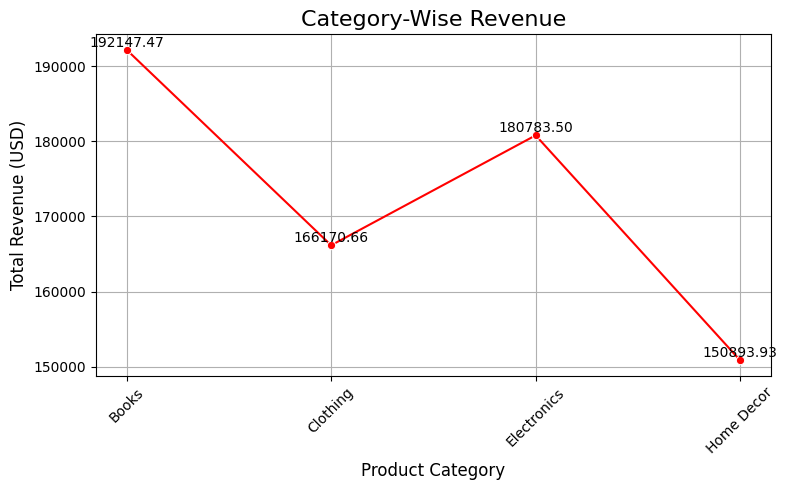

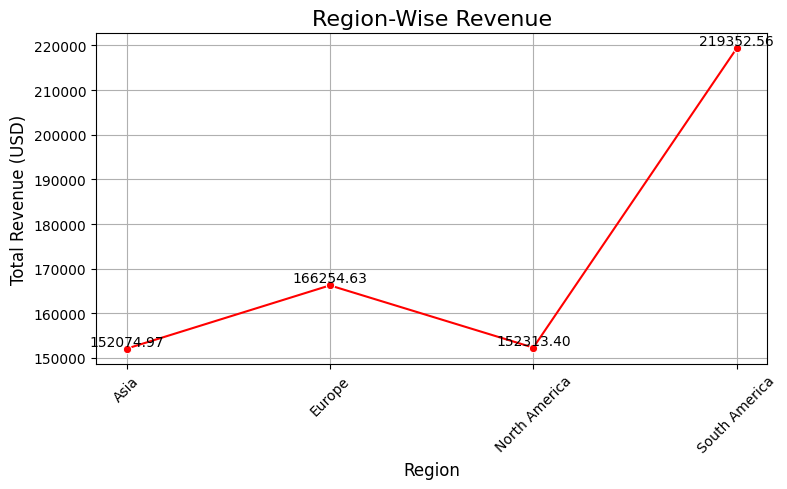

In [50]:
transac_products = pd.merge(transac, products, on='ProductID', how='inner')
category_revenue = transac_products.groupby('Category')['TotalValue'].sum()

transac_customers = pd.merge(transac, customers, on='CustomerID', how='inner')
transac_full = pd.merge(transac_customers, products, on='ProductID', how='inner')
regions_revenue = transac_full.groupby('Region')['TotalValue'].sum()

plt.figure(figsize=(8, 5))
sns.lineplot(x=category_revenue.index, y=category_revenue.values, marker='o', color='red')
plt.title('Category-Wise Revenue', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

for x, y in zip(category_revenue.index, category_revenue.values):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
sns.lineplot(x=regions_revenue.index, y=regions_revenue.values, marker='o', color='red')
plt.title('Region-Wise Revenue', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

for x, y in zip(regions_revenue.index, regions_revenue.values):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()


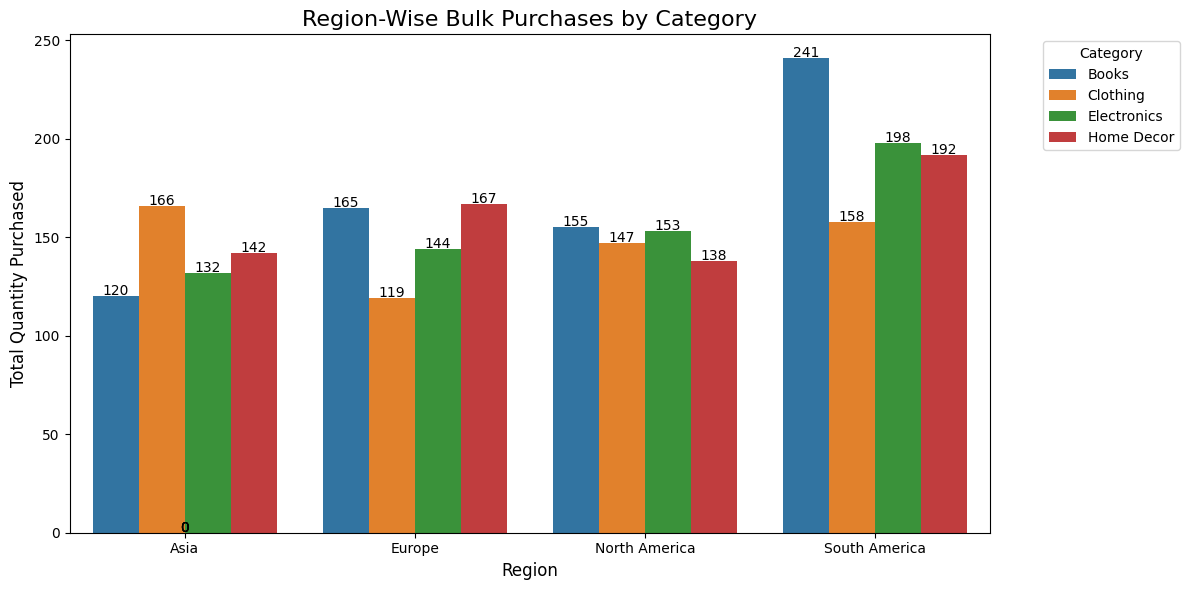

In [56]:
transac_customers = pd.merge(transac, customers, on='CustomerID', how='inner')
transac_full = pd.merge(transac_customers, products, on='ProductID', how='inner')

region_category_quantity = transac_full.groupby(['Region', 'Category'])['Quantity'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=region_category_quantity,
    x='Region',
    y='Quantity',
    hue='Category',
    palette='tab10'
)

plt.title('Region-Wise Bulk Purchases by Category', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Quantity Purchased', fontsize=12)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

for p in plt.gca().patches:
    plt.text(
        p.get_x() + p.get_width() / 2,
        p.get_height() + 0.5,
        int(p.get_height()),
        ha='center',
        fontsize=10
    )

plt.tight_layout()
plt.show()


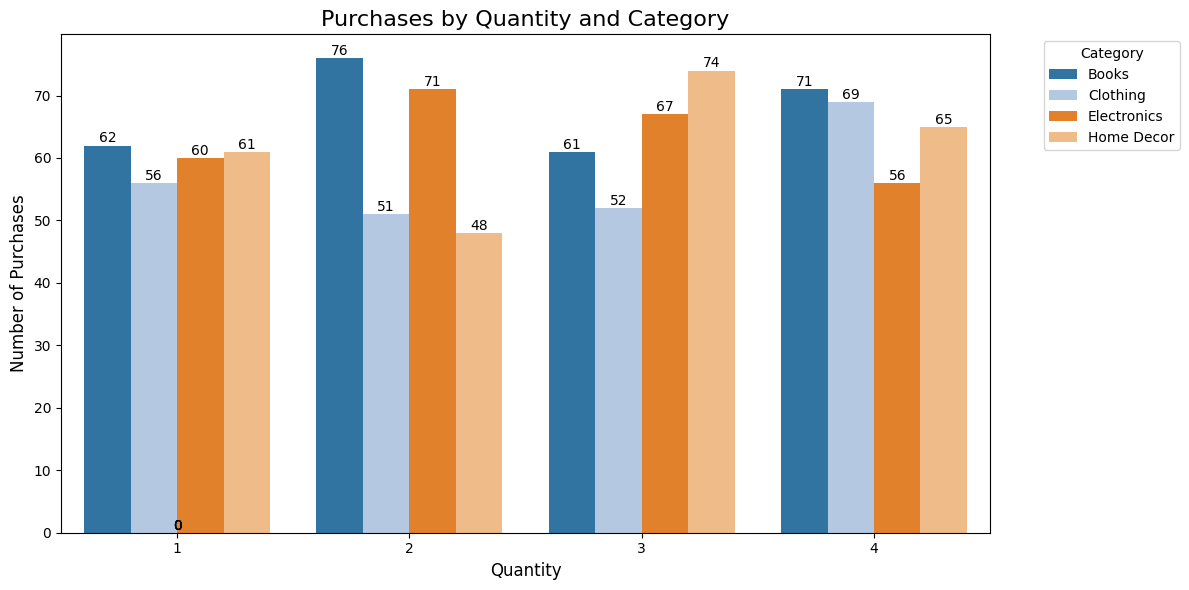

In [55]:
transac_products = pd.merge(transac, products, on='ProductID', how='inner')

quantity_categories = transac_products.groupby(['Quantity', 'Category']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=quantity_categories,
    x='Quantity',
    y='Count',
    hue='Category',
    palette='tab20'
)

plt.title('Purchases by Quantity and Category', fontsize=16)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

for p in plt.gca().patches:
    plt.text(
        p.get_x() + p.get_width() / 2,
        p.get_height() + 0.5,
        int(p.get_height()),
        ha='center',
        fontsize=10
    )

plt.tight_layout()
plt.show()
